## Unscented-Kalman-Filter

### GOALS :

Two differerent pedestrian tracking datasets were provided for this project.
The data includes Laser and Radar measurements. 
The goal was to create a Unscented Kalman Filter to make preditions of the pedestrian position
using the CTRV motion model and then update the expected position. 

### How to run:
- Make build directory: **mkdir build && cd build**
- Compile the code: **cmake .. && make**
- Run the code: ** ./UnscentedKF  <radar_lidar= 3><std_a= 1> <std_yawdd= 0.5> <NIS_output_file= /tmp/NIS_output> **
- <radar_lidar= 3> has value 1 for lidar, 2 for radar and 3 for both
-<std_a= 1> : can be modify to any number such that we can minimize RMSE
-<std_yawdd= 0.5>: can be modify to any number such that we can minimize RMSE
-example : % ../build/UnscentedKF 3 0.5 2.0 /tmp/NIS2

### Criteria #01: RMSE = [0.09, 0.10, 0.40, 0.30]
For data set #1 :
RMSE1 = [0.457431, 0.574551, 272.481, 262.453]

For data set #2:
RMSE2 = [ 1.06592,0.891171, 54.0365, 62.4283]

for ../build/UnscentedKF 3 0.5 2.0 /tmp/NIS2

Obviously, this is not meet expectation but I tried to debug and fix issues but it improves a little bit.
I with different std_a and std_yawdd but 


### Criteria #02  : Follow the Correct Algorithm
Lecture sample code are used to add to the project one at a time:
    *  Augmentation
    *  SigmaPoint prediction
    *  Predict meand and Covariance
    *  Predict Radar/Licar measurement
    *  Update UKF for radar, Lidar
    

### Criteria : Code Efficiency
    * Modularization to simimplify code in main.cpp for easier to debug
        void Init_Radar_Parameters (MeasurementPackage meas_package);
        void Init_Laser_Parameters (MeasurementPackage meas_package);
        void Init_weights ();
    * The Prediction() also modularize to match lecture notes for easy reference during debug:
        void AugmentedSigmaPoints(MatrixXd* Xsig_out);
        void SigmaPointPrediction(MatrixXd* Xsig_out, MatrixXd Xsig_aug, double delta_t);
        void PredictMeanAndCovariance(VectorXd* x_pred, MatrixXd* P_pred, MatrixXd Xsig_pred_);
    * Factorize code so that both Lidar and Radar share :
        void UpdateUKF(MeasurementPackage meas_package, MatrixXd Zsig);
        void UpdateRadar(MeasurementPackage meas_package);
        void UpdateLidar(MeasurementPackage meas_package);

### Criteria : NIS information is collected.
    * How to use this to tune parameter for UKF is still a myth.
    * Here is the graph collected.
    * It seemed that the Lidar path is working great but not the radar path.
    

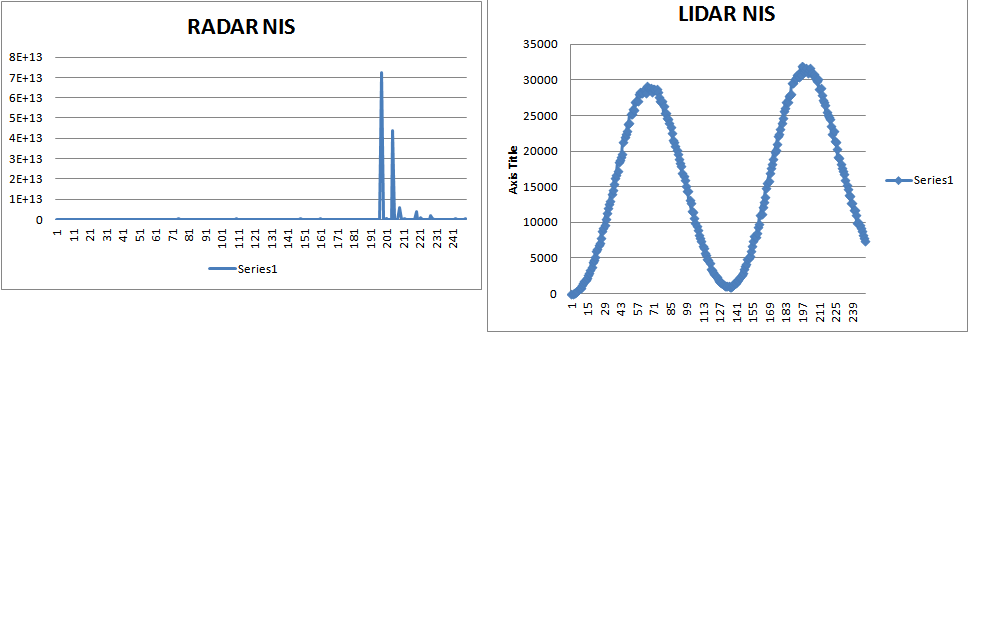

In [2]:
from IPython.display import Image
Image("./Nis_info.png")